# Brute force - lookup the edit distance of each word

In [6]:
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
from data_preparation import loadData, SentenceSplitter

## Load text words

In [7]:
_, _, allData, _ = loadData()

Loading datasets...
train: (127656, 8), test: (31915, 8), allData: (159571, 8), contestTest: (153164, 2)


In [9]:
data = SentenceSplitter("comment_text").transform(allData)

Splitting sentences...


In [11]:
textWords = set([word for sentence in data for word in sentence])

## Load small embedding

In [2]:
embedding = KeyedVectors.load("../../state/external-models/glove.6B/saved-50.bin", mmap="r")

In [12]:
embeddingWords = embedding.vocab.keys()

In [28]:
len(embeddingWords)

400000

## Missing words count and distribution

In [19]:
missingWords = textWords - embeddingWords
print("Missing {} words out of total {} words. This is {}% of the words!".format(
    len(missingWords), 
    len(textWords),
    int(len(missingWords) / len(textWords) * 100)))

Missing 133049 words out of total 223966 words. This is 59% of the words!


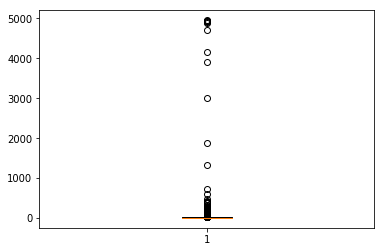

In [59]:
import matplotlib.pyplot as plt

plt.boxplot([len(word) for word in missingWords])

plt.show()

In [60]:
len([word for word in missingWords if len(word) >= 1000])

13

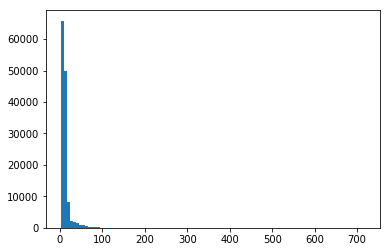

In [61]:
plt.hist([len(word) for word in missingWords if len(word) < 1000], bins=100)

plt.show()

In [62]:
len([word for word in missingWords if len(word) >= 100])

317

In [71]:
# This is how large an 100 char word is!!
len("sgfdgfdglgdsgfdggfdgghdggsdggfdhgfdfdggfdghgsafldsfdsfdsfdsfdsfdsfdsffdssafsFEGFFDGFDSGFDgfdgfdsfdsf")

100

In [73]:
# This is a 24 char word
len("Pozessorgeschwindichkeit")

24

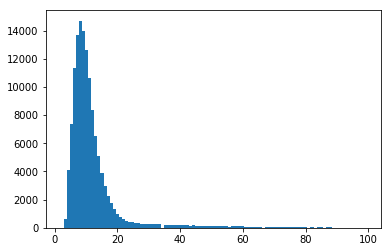

In [63]:
plt.hist([len(word) for word in missingWords if len(word) < 100], bins=100)

plt.show()

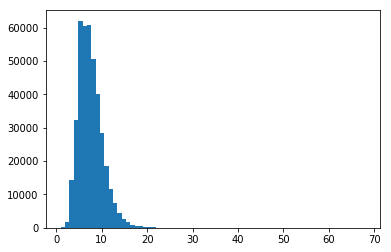

In [81]:
# Histogram of 'normal' words
plt.hist([len(word) for word in embeddingWords], bins=70)

plt.show()

In [52]:
list(missingWords)[0:30]

['potribuju',
 'specialrandom',
 'rehgar',
 'inclusionscomparisonscontrasts',
 'templateukacademicbiostub',
 'romour',
 'theegyptian',
 'cathcphrase',
 'tarensk',
 'saltyboar',
 'beened',
 'jimtaip',
 'brybon',
 'talkfelling',
 'praxei',
 'muyangi',
 'httpenwikipediaorgwikihaplogroupjydna',
 'quiescencesearch',
 'inapprorpriate',
 'talkediting',
 'nonauthoritative',
 'simpleenglish',
 'listbut',
 'zalimun',
 'carcinologists',
 'isaivellar',
 'nonscab',
 'templateuwharass',
 'googleand',
 'nonthorough']

## Word distance

In [20]:
import editdistance

In [24]:
def closestWord(inputWord, dictionary):
    result = None
    for word in dictionary:
        if editdistance.eval(word, inputWord) <= 2:
            result = word
            break
    return result

In [26]:
editdistance.eval("test", "that")

2

In [45]:
%%time
# Works good
print(closestWord("inapprorpriate", embeddingWords))
print(closestWord("tendancies", embeddingWords))

inappropriate
tendencies
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 50.5 ms


In [51]:
%%time
# Works bad
print(closestWord("msturbtion", embeddingWords))
print(closestWord("widht", embeddingWords))

maturation
with
CPU times: user 76 ms, sys: 4 ms, total: 80 ms
Wall time: 78.1 ms


In [44]:
%%time
# Reasonable speed
print(closestWord("inclusionscomparisonscontrasts", embeddingWords))

None
tendencies
CPU times: user 864 ms, sys: 0 ns, total: 864 ms
Wall time: 866 ms
